In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d

[ 0.13241507 -0.12050375  0.15367234  0.24410954 -0.03886484  0.00121916
 -0.20119116  0.16037232  0.01728983  0.10577078 -0.06756164  0.12895304
  0.15596668  0.19613343 -0.06554332 -0.2230573  -0.23904799 -0.12276701
 -0.0499117   0.02878255]


Text(0, 0.5, '# of sites')

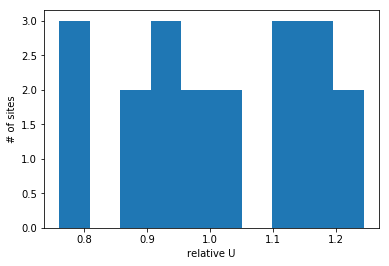

In [13]:
path = 'C:/Users/wangy/'
#path1 = '2023_01_30_21_40_39_L20_1' #20% difference 
path1 = '2023_02_07_11_20_41_L20_1site_dep_int' # 5% difference 
data = np.loadtxt(path + 'Rydberg simulation/rydberg_data/2_6_23/Overlap'+path1,delimiter=',')
z0 =  np.loadtxt(path +'Rydberg simulation/rydberg_data/2_6_23/z_'+path1,delimiter=',')
zz0 =  np.loadtxt(path +'Rydberg simulation/rydberg_data/2_6_23/zz_'+path1,delimiter=',')
z0_g =  np.loadtxt(path +'Rydberg simulation/rydberg_data/2_6_23/zg_'+path1,delimiter=',')
zz0_g =  np.loadtxt(path +'Rydberg simulation/rydberg_data/2_6_23/zzg_'+path1,delimiter=',')
site_dep = np.loadtxt(path + 'Rydberg simulation/rydberg_data/2_6_23/site_dep_int_'+path1,delimiter=',')
print(site_dep)
plt.hist(1+site_dep)
plt.xlabel('relative U')
plt.ylabel('# of sites')

Text(0, 0.5, 'overlap with 1st excited state')

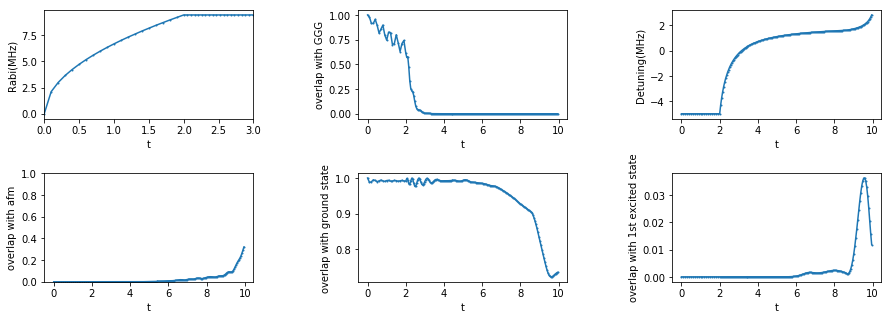

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(15,5))
#op_list1 = ['t','Detuning','rabi','overlap_g','overlap_afm','overlap_0','overlap_1','overlap_2','overlap_3']
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data[0],data[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data[0],data[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_xlim([0,3])
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data[0],data[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data[0],data[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data[0],data[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data[0],data[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')


In [5]:
site_dep

array([ 0.13241507, -0.12050375,  0.15367234,  0.24410954, -0.03886484,
        0.00121916, -0.20119116,  0.16037232,  0.01728983,  0.10577078,
       -0.06756164,  0.12895304,  0.15596668,  0.19613343, -0.06554332,
       -0.2230573 , -0.23904799, -0.12276701, -0.0499117 ,  0.02878255])

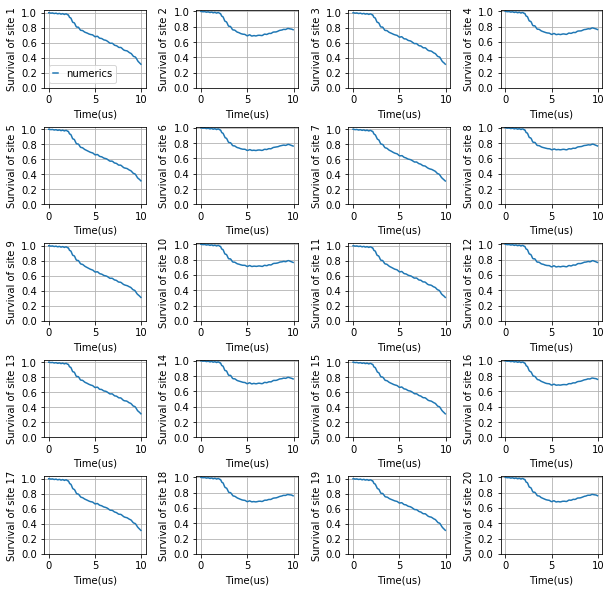

In [6]:
N = 20

fig,ax = plt.subplots(ncols = 4 ,nrows=5,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    n = 1-(z0[:,i]+1)/2
    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
plt.show()
#print((standard_deviation**0.5)/N)

In [7]:
N = 20
sign = np.ones(N)
sign[0::2]=-1
sigma2_g = []
sigma_c_g = []
x = np.arange(N)
x = np.arange(N)
sigma_c = []
sigma2 = []
for t_id in range(len(data[0])):
    z_g = z0_g[t_id]
    zz_g = zz0_g[t_id].reshape(N,N)
    n_g = (1-z_g)/2
    n_g_mean = np.mean(n_g)
    sigma_g = (n_g[:]-n_g_mean)*sign
    nn_g = (np.ones((N,N))-z_g-z_g[:,np.newaxis]+zz_g)/4
    z = z0[t_id]
    zz = zz0[t_id].reshape(N,N)
    n = (1-z)/2
    n_mean = np.mean(n)
    sigma = (n[:]-n_mean)*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    for i in x:
        temp_g = (-1)**i * (nn_g[0,i]-n_g_mean*n_g[0]-n_g_mean*n_g[i]+n_g_mean**2)
    
        sigma2_g.append(temp_g)
        sigma_c_g.append(temp_g-sigma_g[0]*sigma_g[i])
        temp =  (-1)**i * (nn[0,i]-n_mean*n[0]-n_mean*n[i]+n_mean**2)
        sigma2.append(temp)
        sigma_c.append(temp-sigma[0]*sigma[i])
sigma2_g = np.array(sigma2_g)
sigma2_g = sigma2_g.reshape(len(data[0]),20)
sigma2 = np.array(sigma2)
sigma2 = sigma2.reshape(len(data[0]),20)

In [8]:
def power_law(x, a, b):
    return a * x**b

In [9]:
crit_det = 1.53
crit_id0 = np.argmin(abs(data[1]-crit_det))

1.5320475638051045 -0.20467229055710273


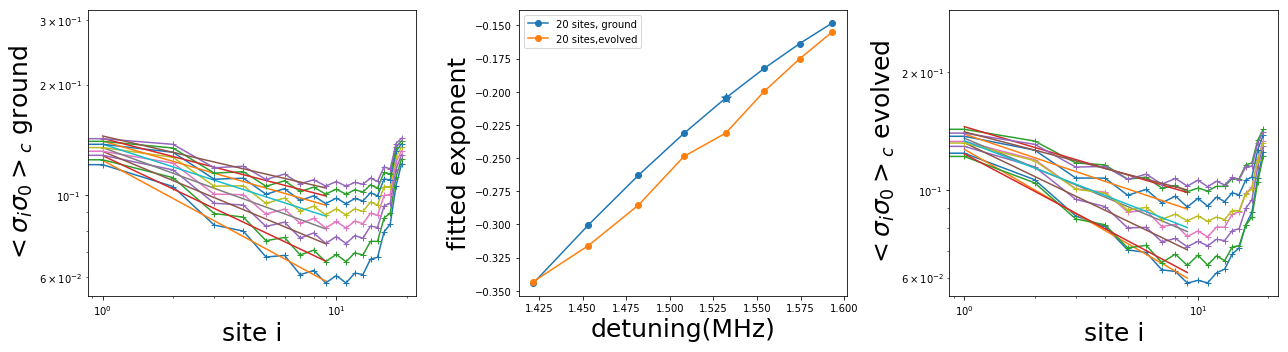

In [10]:
# plot for ground state
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(18,5))
detuning_list_g = []
exponent_list_g = []
exponent_list = []

for t_id in range(crit_id0-20,crit_id0+20,5):
   # ax[0].plot(x,sigma2_g[t_id],marker = '^',color='C%d'%it)
    ax[0].plot(x,sigma2_g[t_id],label='ground state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')
    ax[2].plot(x,sigma2[t_id],label='evolved state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')

 #   ax[2].scatter(np.arange(0,N),n_g)
    detuning_list_g.append(data[1,t_id])
    
    # define the power law function
    fit_range = 8
    # define the data points
    xdata = np.arange(1,fit_range)
    ydata = sigma2[t_id,1:fit_range]

    ydata_g = sigma2_g[t_id,1:fit_range]
    # fit the power law to the data
    
    params, params_covariance = curve_fit(power_law, xdata, ydata)

    params_g, params_covariance_g = curve_fit(power_law, xdata, ydata_g)
    # evaluate the fitted power law function and plot it
    xfit = np.linspace(1, fit_range+1, 100)
    yfit = power_law(xfit, params[0], params[1])

    yfit_g = power_law(xfit, params_g[0], params_g[1])
    exponent_list.append(params[1])
    ax[2].plot(xfit, yfit, '-')

    exponent_list_g.append(params_g[1])
#    ax[0].plot(xfit, yfit_g, '-',color='C%d'%it)
    ax[0].plot(xfit, yfit_g, '-')
    if t_id == crit_id0:
        print(data[1,t_id],params_g[1])
        ax[1].scatter(data[1,t_id],params_g[1],s=100,color = 'C0',marker = '*',zorder = 2)
ax[1].plot(detuning_list_g,exponent_list_g,marker = 'o',zorder =1,label = '20 sites, ground')
ax[1].plot(detuning_list_g,exponent_list,marker = 'o',zorder =1,label = '20 sites,evolved')

ax[1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[1].set_ylabel('fitted exponent',fontsize = 25)
ax[1].legend()





ax[0].set_xlabel('site i',fontsize = 25)
ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$ ground',fontsize = 25)
#ax[2].plot(np.arange(0,N),n_g)
ax[2].set_xlabel('site i',fontsize = 25)
ax[2].set_ylabel('$<\sigma_i\sigma_0>_c$ evolved',fontsize = 25)
ax[0].set_xscale('log')
ax[0].set_yscale('log')   
ax[2].set_xscale('log')
ax[2].set_yscale('log') 
fig.tight_layout()
#plt.suptitle('ground state',fontsize=25,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)